In [233]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [234]:
data = pd.read_table('wine.data', sep=",", header=None, index_col = None 
                   ,names = ["Class", "Alcohol", "Malic acid", "Ash"
                    ,"Alcalinity of ash","Magnesium","Total phenols"
                    ,"Flavanoids","Nonflavanoid phenols","Proanthocyanins"
                    ,"Color Intensity","Hue","OD280/OD315 of diluted wines","Proline"]);

In [235]:
#Wybór ilości kolumn
def ustal_X(n):
    X = data.iloc[:,1:n+1]
    return X 
#Wektor Klas 
y = data.iloc[:,0]

ALL = 13; 

In [236]:
#Funckja do wyliczenia wszystkich możliwych składowych PCA 
def std_PCA(dane,min_range,max_range) :
    std = []
    for i in range(min_range,max_range):
        pca = PCA(n_components=i)
        pca.fit(dane)
        x_pca = pca.transform(dane)
        std.append(x_pca.std())
    return std

In [237]:
std_PCA(ustal_X(ALL),1,14)

[314.0771817455471,
 222.2791511370932,
 181.49878525860373,
 157.18650569413126,
 140.59275388932966,
 128.34358091318762,
 118.82323364439641,
 111.1490421161973,
 104.79238096445393,
 99.41481744366519,
 94.78832716707198,
 90.7529235490666,
 87.1925922003644]

Widzimy, że wartości odchyleń standardowych są niepokojąco duże, wynika to z różnych wartości dla zbioru wine - zatem należy zawarte w nim dane przeskalować:

In [238]:
#Skalowanie danych
scaler = StandardScaler()
scaler.fit(ustal_X(ALL))
scaled_wine= scaler.transform(ustal_X(ALL))

In [239]:
#Wszystkie składowe głowne 
std_PCA(scaled_wine,1,14)

[2.169297179500869,
 1.8977386525021818,
 1.69792971547844,
 1.5465986777334086,
 1.4436826561416627,
 1.3578632165845574,
 1.2880651825598841,
 1.2228185047744438,
 1.1667219371466513,
 1.1181262535950864,
 1.0756753409110242,
 1.036686310008685,
 1.0000000000000002]

In [240]:
#Skumulowane odchylenie standardowe 
sum_std = [sum(std_PCA(scaled_wine,1,14)[:i]) for i in range(1,14)]

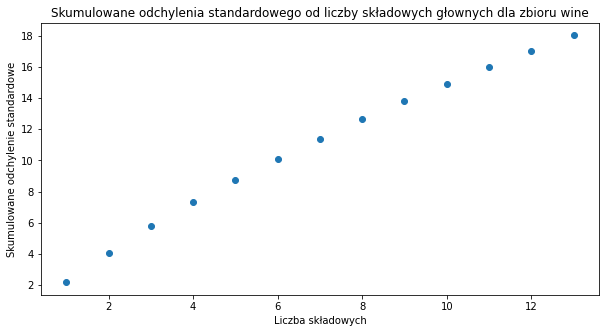

In [241]:
# Wykres skumulowanego odchylenia standardowego od ilości składowych głownych

plt.figure(figsize=(10,5))
plt.scatter(list(range(1,14)),sum_std)
plt.xlabel('Liczba składowych')
plt.ylabel('Skumulowane odchylenie standardowe')
plt.title("Skumulowane odchylenia standardowego od liczby składowych głownych dla zbioru wine")
plt.show()

In [242]:
#PCA dla trzech składowych żeby potem "wyciągnąć" dla 1 i 2 oraz 2 i 3 
pca = PCA(n_components=3)
x_pca = pca.fit(scaled_wine)
x_pca = pca.transform(scaled_wine)

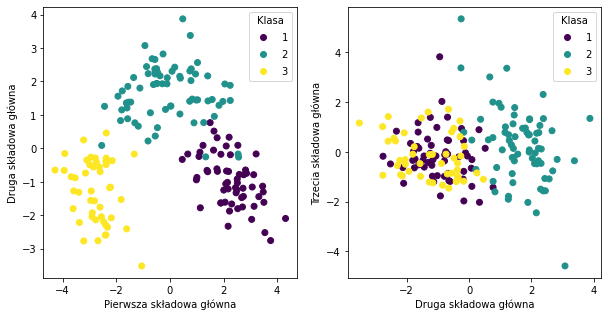

In [243]:
#Dla 1 i 2 składowej głównej 
fig, ax = plt.subplots(1,2,figsize=(10,5))
ax1s = ax[0].scatter(x_pca[:,0],x_pca[:,1],c=y)
ax[0].set_xlabel('Pierwsza składowa główna')
ax[0].set_ylabel('Druga składowa główna')
ax[0].legend(*ax1s.legend_elements(), title="Klasa")
#Dla 2 i 3 składowej głownej 
ax2s = ax[1].scatter(x_pca[:,1],x_pca[:,2],c=y)
ax[1].set_xlabel('Druga składowa główna')
ax[1].set_ylabel('Trzecia składowa główna')
ax[1].legend(*ax2s.legend_elements(), title="Klasa")
plt.show()

Wykres dla 1 i 2 składowej głównej pokazuję, że punkty klas są separowalne i zastosowanie tej metody jest sensowne. 
Wykres dla 2 i 3 składowej głównej nie wykazuję separacji punktów z klasy 1 i 3, co świadczy o nienajlepszej skuteczności tej metody, gdzie uwzględniamy dalsze składowe główne niż 1 i 2. 